# ANÁLISIS DE RESERVAS DE HOTEL

### Analisis de reservas de hoteles.
<p>Los datos son de la web de Kaggle:</p> 
<p><u>Usuario:</u> <i>MOJTABA</i></p>
<p><u>Título:</u> <i>Hotel Booking - Hotel booking demand datasets(Data in Brief:2019)</i></p>
<u>Enlace:</u> https://www.kaggle.com/datasets/mojtaba142/hotel-booking

<p>Para este proyecto analizaré reservas de hoteles para seguir practicando mis habilidades analíticas utilizando mis
conocimientos de <b><i>Python and Power BI</i></b>. Siempre que sea posible, se aplicaré técnicas de <i>Machine Learning</i>.</p>

<p>Trabajaré con el siguiente archivo:</p> 
<ul>
    <li>
        <b><i>hotel_booking_mojtaba.csv</i></b>
    </li>
</ul>

### 1. Importando las librerías

In [1]:
# Librerías para manipular los datos
import pandas as pd
import numpy as np

# Librerias para crear los gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos de predicciones
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Para ignorar alertas
import warnings
warnings.filterwarnings('ignore')


### 2. Importanto los datos

<P>Importemos el archivo <b><i>'hotel_booking_mojtaba.csv'</i></b> para iniciar el análisis. Es un archivo .csv. Primero, limpiaré y
prepararé los datos para el análisis. Luego vamos a trabajar con ellos para ayudar a los interesados a tomar mejores decisiones basadas en datos.</P>

In [2]:
df_rawdata = pd.read_csv('../hotel_bookings/csv_files/hotel_booking_mojtaba.csv')
df_rawdata.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...      Transient   
1                        0                     0       2  ...      Transient   
2                        0                     1       1  ...      Transient   
3                        0                     1       1  ...      Transient   
4                        0                     2       2  ...      Transient   

    adr required_car_parking_spaces total_of_special_requests  \
0   0.0                           0                         0   
1   0.0                           0                         0   
2  75.0                           0                         0   
3  75.0                           0                         0   
4  98.0                           0                         1   

  reservation_status reservation_status_date            name  \
0          Check-Out              2015-07-01   Ernest Barnes   
1          Check-Out              2015-07-01    Andrea Baker   
2          Check-Out              2015-07-02  Rebecca Parker   
3          Check-Out              2015-07-02    Laura Murray   
4          Check-Out              2015-07-03     Linda Hines   

                         email  phone-number       credit_card  
0  Ernest.Barnes31@outlook.com  669-792-1661  ************4322  
1       Andrea_Baker94@aol.com  858-637-6955  ************9157  
2   Rebecca_Parker@comcast.net  652-885-2745  ************3734  
3            Laura_M@gmail.com  364-656-8427  ************5677  
4           LHines@verizon.com  713-226-5883  ************5498  

[5 rows x 36 columns]

##### 2.1 Estructura de los datos

<p>Ahora es el momento de ver cómo están compuestos los datos, comprobar si faltan valores y seleccionar aquellos datos con los que vamos a trabajar. Los nuestra base de datos se encuentra en la variable 'df_rawdata'. Una vez que los datos estén listos para el análisis, cambiaré el nombre de nuestra base. El motivo es tener un backup en caso de que se eliminen datos por error.</p>

In [3]:
# Verificamos las columnas y tipos de datos que poseen
df_rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### 3 Limpieza de los datos

<p>Eliminaré aquellas columnas ya que no son necesarias para el análisis, entre ellas, las columnas que almacenan los datos de los clientes.</p>

<p>Modificaré el nombre de la base de datos por el de: <i>'df_hb'</i>.</p>

In [4]:
# Realizando una copia de seguridad de nuestros datos
df_hb = df_rawdata.copy()
df_hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [5]:
# Verificando los valores faltantes
missing_values = df_hb.isnull().sum()
print('Number of missing values: ', missing_values)

Number of missing values:  hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                         

##### 3.1 Observaciones

<p>Descubrí que las columnas <i>'country', 'agent', and 'company'</i> son las que tienen la mayor cantindad de datos faltantes. Recomiendo para un futuro completar en lo mayor posible los datos de la columna <i>'agent'</i> con el fin de conocer los agentes que proporcionan la mayor cantidad de clientes. Esto permitirá crear ofertas para cada uno de ellos.</p>

<p>Como poseo interés en trabajar con la columna <i>'country'</i>, voy a reemplazar los valores faltantes por el valor con código <b>'OTR'</b>. El propósito es saber los países de los que provienen nuestros clientes.</p>

<p>Eliminaré los cuatro valores faltantes de la columna <i>'children'</i>; eliminarlos no afecta a nuestro análisis.</p>

In [6]:
# Reemplazando os valores faltantes en la columna 'country'
df_hb['country'].fillna('OTR', inplace=True)

# Eliminando las columnas que NO se utilizarán en nuestro análisis
df_hb.drop(['previous_cancellations', 'previous_bookings_not_canceled', 'days_in_waiting_list', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card'], axis='columns', inplace=True)

# Verificando que poseemos las columnas necesarias para nuestro análisis
df_hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type', 'assigned_room_type',
       'booking_changes', 'deposit_type', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# Removiendo los valores de la columna 'children'
df_hb.dropna(subset=['children'], inplace=True)

# Comprobando que no tenemos más valores faltantes
missing_values2 = df_hb.isnull().sum()
print('Number of missing values: ', missing_values2)

Number of missing values:  hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
dtype: int64


In [8]:
# Vereficando la cantidad de filas que posee nuestra base
df_hb_lens = len(df_hb)
print('El número de filas de nuestra base de datos es: ', df_hb_lens)

El número de filas de nuestra base de datos es:  119386


### 4 Trabajando con los datos

<p>Con los datos limpios y listos para el análisis, es hora de generar la información que ayudará a nuestros <b>stakeholders</b> a tomar <u><i>mejores decisiones basadas en datos.</i></u></p>

##### 4.1 Filtrado de datos

<p>Separaré los datos en dos categorías: <i>City Hotel</i> and a <i>Resort Hotel</i>. Primero los analizaré por separado, y luego, procederé a analizarlos juntos para entender las temporadas.</p>

<p>Es momento de crear dos bases de datos.</p>

In [9]:
# CITY HOTEL
df_hb_CH = df_hb.groupby(by=['hotel']).get_group('City Hotel')

df_hb_CH.head(5)

hotel  is_canceled  lead_time  arrival_date_year  \
40060  City Hotel            0          6               2015   
40061  City Hotel            1         88               2015   
40062  City Hotel            1         65               2015   
40063  City Hotel            1         92               2015   
40064  City Hotel            1        100               2015   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
40060               July                        27                          1   
40061               July                        27                          1   
40062               July                        27                          1   
40063               July                        27                          1   
40064               July                        27                          2   

       stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
40060                        0                     2       1  ...   
40061                        0                     4       2  ...   
40062                        0                     4       1  ...   
40063                        2                     4       2  ...   
40064                        0                     2       2  ...   

       reserved_room_type  assigned_room_type booking_changes deposit_type  \
40060                   A                   A               0   No Deposit   
40061                   A                   A               0   No Deposit   
40062                   A                   A               0   No Deposit   
40063                   A                   A               0   No Deposit   
40064                   A                   A               0   No Deposit   

      customer_type   adr  required_car_parking_spaces  \
40060     Transient   0.0                            0   
40061     Transient  76.5                            0   
40062     Transient  68.0                            0   
40063     Transient  76.5                            0   
40064     Transient  76.5                            0   

      total_of_special_requests reservation_status  reservation_status_date  
40060                         0          Check-Out               2015-07-03  
40061                         1           Canceled               2015-07-01  
40062                         1           Canceled               2015-04-30  
40063                         2           Canceled               2015-06-23  
40064                         1           Canceled               2015-04-02  

[5 rows x 27 columns]

In [10]:
# RESORT HOTEL
df_hb_RH = df_hb.groupby(by=['hotel']).get_group('Resort Hotel')

df_hb_RH.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  \
0                        0                     0       2  ...   
1                        0                     0       2  ...   
2                        0                     1       1  ...   
3                        0                     1       1  ...   
4                        0                     2       2  ...   

   reserved_room_type  assigned_room_type booking_changes deposit_type  \
0                   C                   C               3   No Deposit   
1                   C                   C               4   No Deposit   
2                   A                   C               0   No Deposit   
3                   A                   A               0   No Deposit   
4                   A                   A               0   No Deposit   

  customer_type   adr  required_car_parking_spaces total_of_special_requests  \
0     Transient   0.0                            0                         0   
1     Transient   0.0                            0                         0   
2     Transient  75.0                            0                         0   
3     Transient  75.0                            0                         0   
4     Transient  98.0                            0                         1   

  reservation_status  reservation_status_date  
0          Check-Out               2015-07-01  
1          Check-Out               2015-07-01  
2          Check-Out               2015-07-02  
3          Check-Out               2015-07-02  
4          Check-Out               2015-07-03  

[5 rows x 27 columns]

hotel              City Hotel  Resort Hotel
arrival_date_year                          
2015                    13678          8314
2016                    38140         18567
2017                    27508         13179


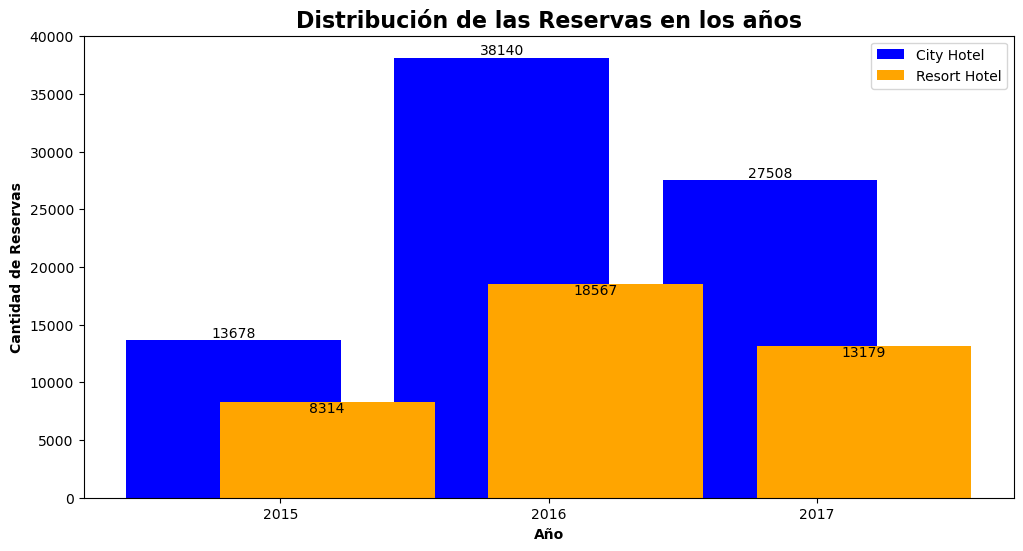

In [11]:
# Analizemos qué hotel tuvo mayor actividad en el año
bookings_activity = df_hb.groupby(['arrival_date_year','hotel']).size().unstack()
print(bookings_activity)

# Variable TOTAL y PORCENTAJE para utilizar con los gráficos
total_bk_count = bookings_activity.sum()
canceled_percentage = (bookings_activity / total_bk_count) * 100

# Extraemos los valores para crear un gráfico de barras
years = bookings_activity.index
ch_count = bookings_activity['City Hotel']
rh_count = bookings_activity['Resort Hotel']

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(12, 6))

# Posicionamiento de las barras
r1 = range(len(years))
r2 = [x + 0.35 for x in r1]

# Barras
bar1 = ax.bar(r1, ch_count, color='blue', label='City Hotel')
bar2 = ax.bar(r2, rh_count, color='orange', label='Resort Hotel')

# Leyenda
ax.set_xlabel('Año', fontweight='bold')
ax.set_ylabel('Cantidad de Reservas', fontweight='bold')
ax.set_title('Distribución de las Reservas en los años', fontsize=16, fontweight='bold')
ax.set_xticks([r + 0.35/2 for r in range(len(years))])
ax.set_xticklabels(years)
ax.legend()

# Añadimos los valores del conteo a las barras
for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='bottom')

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height, f'{int(height)}', ha='center', va='top')
plt.show()

##### 4.2  Análisis City Hotel

<p>Modificaré los valores de la columna <i>'is_canceled'</i>. Voy a reemplazar los valores de 0 y 1 por los siguientes <u>0 = cancelado</u> y <u>1 = no cancelado</u>. Como el motivo es practicar el modificar datos, decidí realizar este proceso por separado para cada uno de los hoteles. Pero, este paso se puede realizar previo a separar los datos en dos bases.</p>

<p>Vayamos a ello</p>

In [12]:
# Modificando los valores
cancel = {
    0: 'cancelado',
    1:'no cancelado'
}

df_hb_CH['is_canceled'] = df_hb_CH['is_canceled'].map(cancel)

df_hb_CH['is_canceled'].head(5)

40060       cancelado
40061    no cancelado
40062    no cancelado
40063    no cancelado
40064    no cancelado
Name: is_canceled, dtype: object

##### 4.2.a Reservaciones canceladas

<p>La siguente base de datos posee los datos de las reservas realizadas en los años <i>2015, 2016,</i> y <i>2017</i>. Entonces, miraré a las cancelaciones analizando el total de los tres años y luego las <b>separaré</b> de <i>forma individual por año</i>.</p>

<p>Esto permitirá a los stakeholders saber <i>el número total de cancelaciones y poder compararlas año con año</i>.</p>

cancelado       46228
no cancelado    33098
Name: is_canceled, dtype: int64


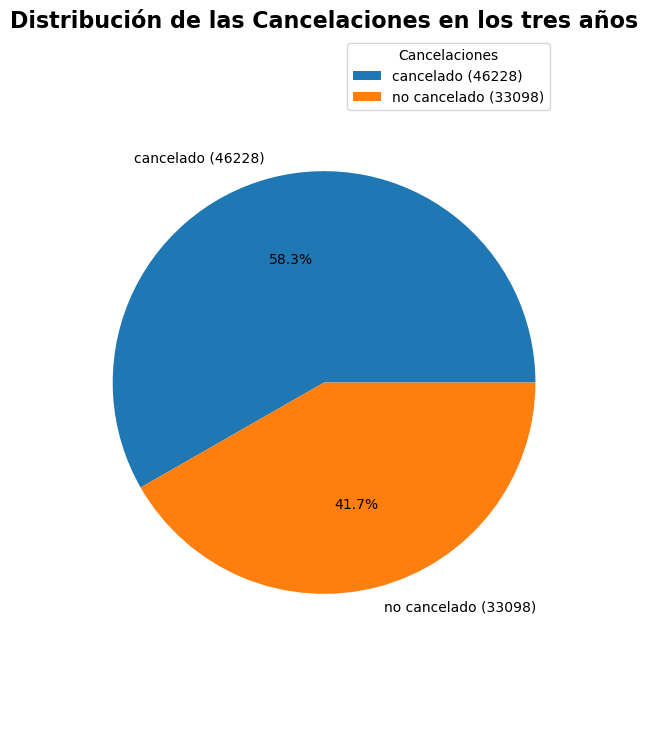

In [13]:
# Realizando el conteo de los valores cancelado y no cancelado. Los almaceno en una variable - CITY HOTEL
canceled_counts = df_hb_CH['is_canceled'].value_counts()
print(canceled_counts)

# Variable TOTAL y PORCENTAJE para utilizar con los gráficos
total_count = canceled_counts.sum()
canceled_percentage = (canceled_counts / total_count) * 100

# Mediante una función creamos las etiquetas
labels = [f'{canceled} ({count})' for canceled, count in zip(canceled_counts.index, canceled_counts)]

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(6, 9))

# Generando nuestro gráfico
plt.pie(canceled_counts, labels=labels, autopct='%1.1f%%')
plt.legend(title='Cancelaciones')
ax.set_title('Distribución de las Cancelaciones en los tres años', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

<p>Los datos muestran que en tres años hubo <u>más reservas canceladas</u> representando <b>un porcentaje total de 58.3%</b>.</p>

<p>Se recomiendo tratar de identificar el motivo o causas de las cancelaciones en las reservas. Este proceso ayudará a entender mejor a sus clientes y con ello, crear promociones para atraer a los clientes y así, reducir el rango de cancelaciones.</p>

<p>Analizemos cuál de los tres años registra el mayor número de cancelaciones.</p>

is_canceled        cancelado  no cancelado
arrival_date_year                         
2015                    7678          6000
2016                   22733         15407
2017                   15817         11691


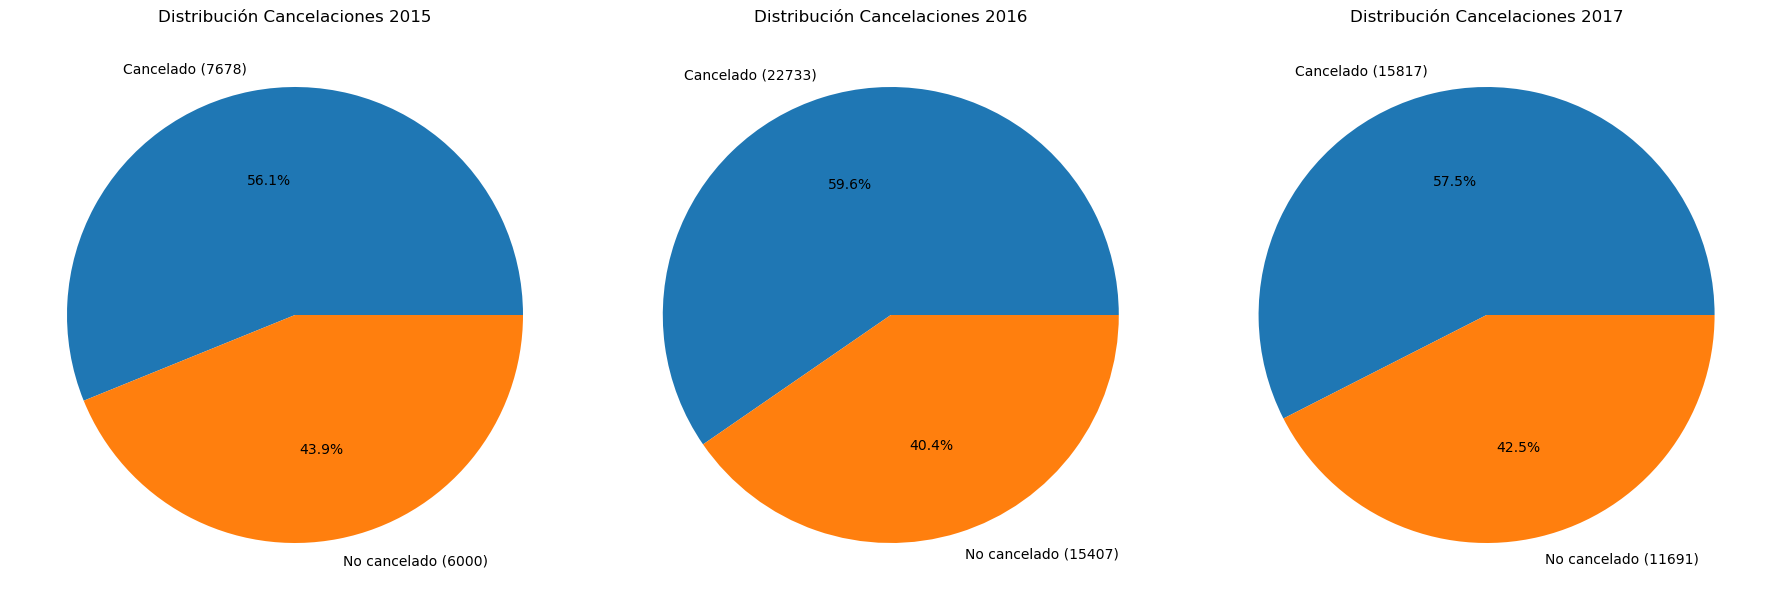

In [14]:
# Separamos las cancelaciones por año
canceled_by_years_count = df_hb_CH.groupby('arrival_date_year', group_keys=False)[['is_canceled']].value_counts().unstack()
print(canceled_by_years_count)

# Creamos los gráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Etiquetas
for i, year in enumerate(canceled_by_years_count.index):
    data = canceled_by_years_count.loc[year]
    labels = [f"{status.capitalize()} ({count})" for status, count in data.items()]
    axs[i].pie(data, labels=labels, autopct='%1.1f%%')
    axs[i].set_title(f'Distribución Cancelaciones {year}')

plt.tight_layout()
plt.show()

##### 4.3 Análisis Resort Hotel

<p>Como el proyecto es para practicar, voy a realizar el mismo análisis que realicé para el hotel de Ciudad con el Resort Hotel. Voy a modificar los valores de la columna <i>'is_canceled'</i>, reemplazando los valores 0 y 1, donde <u>0 = cancelado</u> y <u>1 = no cancelado</u></p>

<p>Comencemos a trabajar con nuestros datos.</p>

In [15]:
# Modificando los valores
cancel = {
    0: 'cancelado',
    1:'no cancelado'
}

df_hb_RH['is_canceled'] = df_hb_RH['is_canceled'].map(cancel)

df_hb_RH['is_canceled'].head(5)

0    cancelado
1    cancelado
2    cancelado
3    cancelado
4    cancelado
Name: is_canceled, dtype: object

##### 4.3.a Reservaciones Canceladas

<p>La siguente base de datos posee los datos de las reservas realizadas en los años <i>2015, 2016,</i> y <i>2017</i>. Entonces, miraré a las cancelaciones analizando el total de los tres años y luego las <b>separaré</b> de <i>forma individual por año</i>.</p>

<p>Esto permitirá a los stakeholders saber <i>el número total de cancelaciones y poder compararlas año con año</i>.</p>

cancelado       28938
no cancelado    11122
Name: is_canceled, dtype: int64


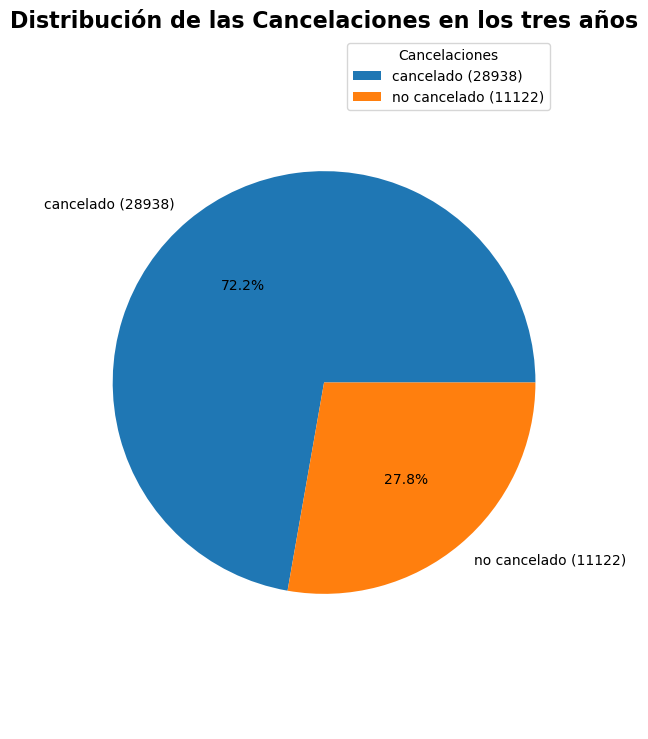

In [16]:
# Contando los valores y los almaceno en una variable - RESORT HOTEL
canceled_counts = df_hb_RH['is_canceled'].value_counts()
print(canceled_counts)

# Variable TOTAL y PORCENTAJE para utilizar con los gráficos
total_count = canceled_counts.sum()
canceled_percentage = (canceled_counts / total_count) * 100

# Con una función creamos las etiquetas
labels = [f'{canceled} ({count})' for canceled, count in zip(canceled_counts.index, canceled_counts)]

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(6, 9))

# Gráfico
plt.pie(canceled_counts, labels=labels, autopct='%1.1f%%')
plt.legend(title='Cancelaciones')
ax.set_title('Distribución de las Cancelaciones en los tres años', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

<p>Los datos muestran que en tres años hubo <u>más reservas canceladas</u> representando <b>un porcentaje total de 72.2%</b>.</p>

<p>Analizemos cuál de los tres años registra el mayor número de cancelaciones.</p>

is_canceled        cancelado  no cancelado
arrival_date_year                         
2015                    6176          2138
2016                   13637          4930
2017                    9125          4054


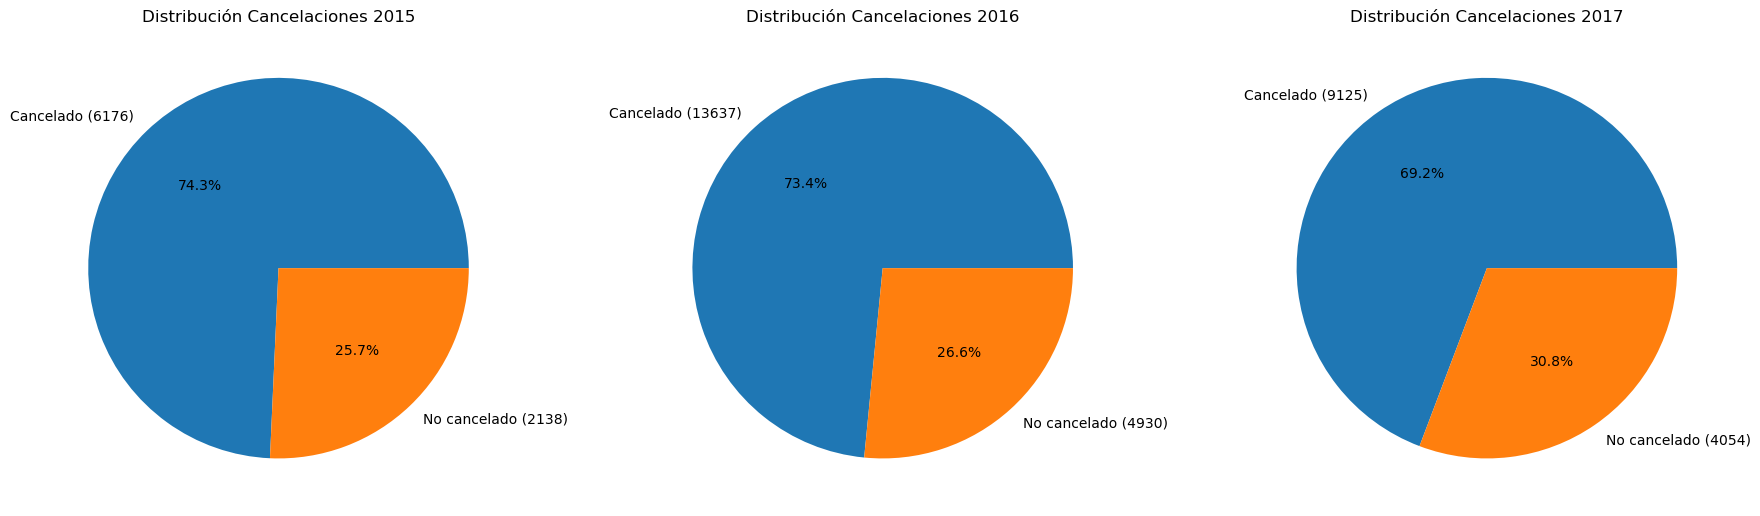

In [17]:
# Separamos los datos por año
canceled_by_years_count = df_hb_RH.groupby('arrival_date_year', group_keys=False)[['is_canceled']].value_counts().unstack()
print(canceled_by_years_count)

# Generamos el gráfico
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Creamos las etiquetas
for i, year in enumerate(canceled_by_years_count.index):
    data = canceled_by_years_count.loc[year]
    labels = [f"{status.capitalize()} ({count})" for status, count in data.items()]
    axs[i].pie(data, labels=labels, autopct='%1.1f%%')
    axs[i].set_title(f'Distribución Cancelaciones {year}')

plt.tight_layout()
plt.show()

<p>Al analizar ambos hoteles, <b>CITY</b> y <b>RESORT</b>, se puede apreciar que el <i>RESORT</i> <u>tiene un mayor</u> porcentaje de cancelaciones, presentendo un total de <b>72.2%</b> contra los <b>58.3%</b> que presenta el hotel <i>CITY</i>. Sin embargo, al analizar las cancelaciones por año, se observa que las cancelaciones en el hotel <i>RESORT</i> disminuyen con el paso de los años, en contrario con el hotel <i>CITY</i> que presenta un incremento en su último año.</p>

##### 4.4 ¿Qué afecta a las cancelaciones?

<p>Para el siguiente análisis, voy a crear una nueva base de datos utilizando las columnas <i>hotel, is_canceled, lead_time, market_segment, and customer_type</i>, con el fin de examinar y poder determinar qué fenómeno puede estar causando las cancelaciones.</p>

<p>Procedamos a crear la base de datos con la que vamos a trabajar.</p>

##### 4.4.a Nueva Base de datos

In [18]:
# Creando la nueva base de datos
df_cancellations = df_hb[['hotel','is_canceled','lead_time','market_segment','customer_type','arrival_date_year']].copy()

df_cancellations.head(5)

hotel  is_canceled  lead_time market_segment customer_type  \
0  Resort Hotel            0        342         Direct     Transient   
1  Resort Hotel            0        737         Direct     Transient   
2  Resort Hotel            0          7         Direct     Transient   
3  Resort Hotel            0         13      Corporate     Transient   
4  Resort Hotel            0         14      Online TA     Transient   

   arrival_date_year  
0               2015  
1               2015  
2               2015  
3               2015  
4               2015

In [19]:
df_cancellations.dtypes

hotel                object
is_canceled           int64
lead_time             int64
market_segment       object
customer_type        object
arrival_date_year     int64
dtype: object

<p>Ahora que tenemos nuestra nueva base de datos, es momento de visualizar las distribuciones y relaciones entre las variables.</p>

<p>Voy a utilizar los valores de la columna<i>'lead_time'</i> junto con un gráfico de histograma para visualizar el número de días pasados entre la reserva y el momento del arribo al hotel. El histograma nos mostrará la distribución de una variable contando el número de observaciones de ella.</p>

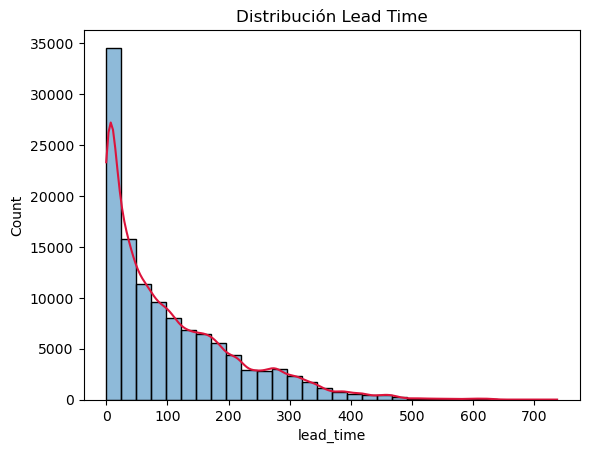

In [20]:

ax = sns.histplot(df_cancellations['lead_time'], bins=30, kde=True)
ax.lines[0].set_color('crimson')
plt.title('Distribución Lead Time')
plt.show()

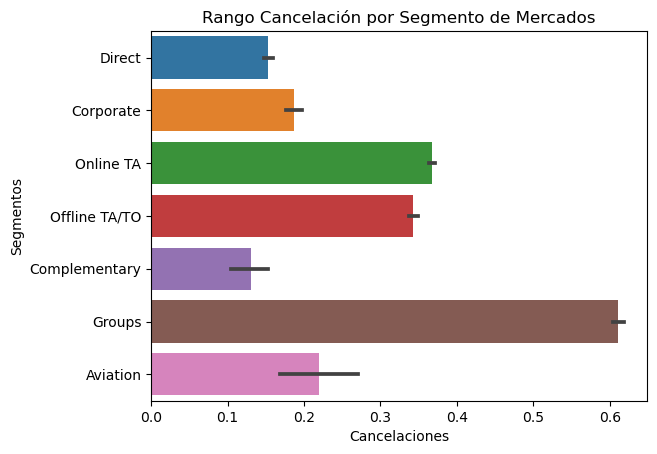

In [21]:
# Cancellation rate by market segment

sns.barplot(x='is_canceled', y='market_segment', data=df_cancellations)
plt.title('Rango Cancelación por Segmento de Mercados')
plt.xlabel('Cancelaciones')
plt.ylabel('Segmentos')
plt.show()

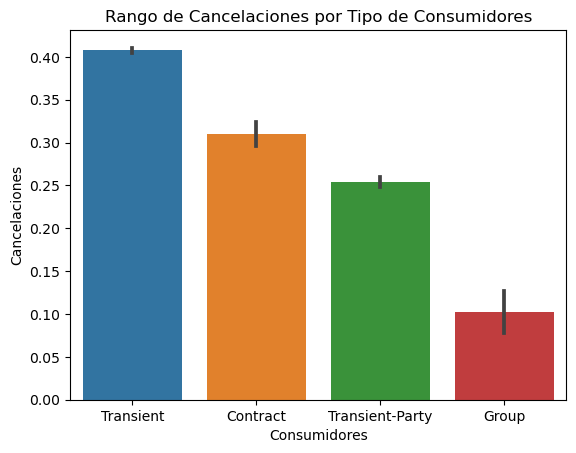

In [22]:
# Cancellation rate by customer type
sns.barplot(x='customer_type', y='is_canceled', data=df_cancellations)
plt.title('Rango de Cancelaciones por Tipo de Consumidores')
plt.xlabel('Consumidores')
plt.ylabel('Cancelaciones')
plt.show()

##### 4.4.b Analizando el impacto de las variables utilizadas

<p>Ahora llegó el momento de utilizar los modelos de <i>Machine Learning</i> con el fin de comprender cuál de nuestras variables es la que afecta a las cancelaciones. Utilizaré el modelo de <i>regresión logística</i> para comprender la relación entre los datos de las columnas <i>'is_canceled', 'lead_time', 'market_segment',</i> y<i>'customer_type'</i>.</p>

In [23]:
# Creamos el modelo de Regresión Logística
cancellation_model = smf.logit('is_canceled ~ lead_time + C(market_segment) + C(customer_type)', data=df_cancellations).fit()

# Sipnosis del modelo
print(cancellation_model.summary())


Optimization terminated successfully.
         Current function value: 0.563430
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:               119386
Model:                          Logit   Df Residuals:                   119375
Method:                           MLE   Df Model:                           10
Date:                Fri, 05 Jul 2024   Pseudo R-squ.:                  0.1452
Time:                        16:03:57   Log-Likelihood:                -67266.
converged:                       True   LL-Null:                       -78695.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -2.3478      0.163 

<p>Una vez desarrollado y presentado el modelo, es necesario <u>comprender</u> la importancia de <b>cada variable</b>.<p>

In [24]:
# Extraemos los valores y coeficientes
cancellation_coef = cancellation_model.params
cancellation_values = cancellation_model.pvalues

# Desplegamos los coeficientes y los valores p
print(f"Coeficientes:\n{cancellation_coef}\n")
print(f"Valores-P:\n{cancellation_values}\n")

Coeficientes:
Intercept                             -2.347786
C(market_segment)[T.Complementary]    -0.713530
C(market_segment)[T.Corporate]         0.017277
C(market_segment)[T.Direct]           -0.714733
C(market_segment)[T.Groups]            1.830286
C(market_segment)[T.Offline TA/TO]     0.380110
C(market_segment)[T.Online TA]         0.297807
C(customer_type)[T.Group]             -0.464664
C(customer_type)[T.Transient]          1.139408
C(customer_type)[T.Transient-Party]   -0.675040
lead_time                              0.005531
dtype: float64

Valores-P:
Intercept                               7.434710e-47
C(market_segment)[T.Complementary]      2.063348e-04
C(market_segment)[T.Corporate]          9.152015e-01
C(market_segment)[T.Direct]             8.137130e-06
C(market_segment)[T.Groups]             2.546703e-30
C(market_segment)[T.Offline TA/TO]      1.694970e-02
C(market_segment)[T.Online TA]          6.027475e-02
C(customer_type)[T.Group]               1.769141e-03
C(custo

<p>Creamos un gráfico para visualizar los datos de nuestro modelo</p>

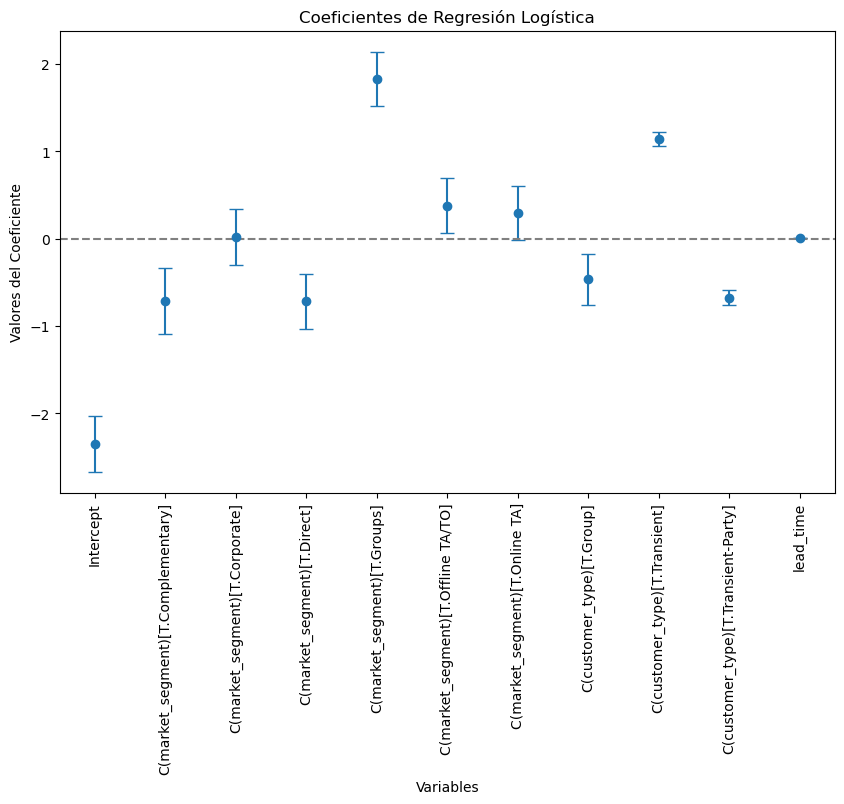

In [25]:
# Necesitamos los intervalos de confidencia
cancell_conf = cancellation_model.conf_int()

# Añadimos los coeficientes a los intervalos
cancell_conf['coeff'] = cancellation_coef

# Renombramos a las columnas para entender los datos
cancell_conf.columns = ['2.5%','97.5%', 'coeff']

# Gráfico
plt.figure(figsize=(10, 6))
plt.errorbar(cancell_conf.index, cancell_conf['coeff'], yerr=[cancell_conf['coeff'] - cancell_conf['2.5%'], cancell_conf['97.5%'] - cancell_conf['coeff']], fmt='o', capsize=5)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=90)
plt.title('Coeficientes de Regresión Logística')
plt.xlabel('Variables')
plt.ylabel('Valores del Coeficiente')
plt.show()

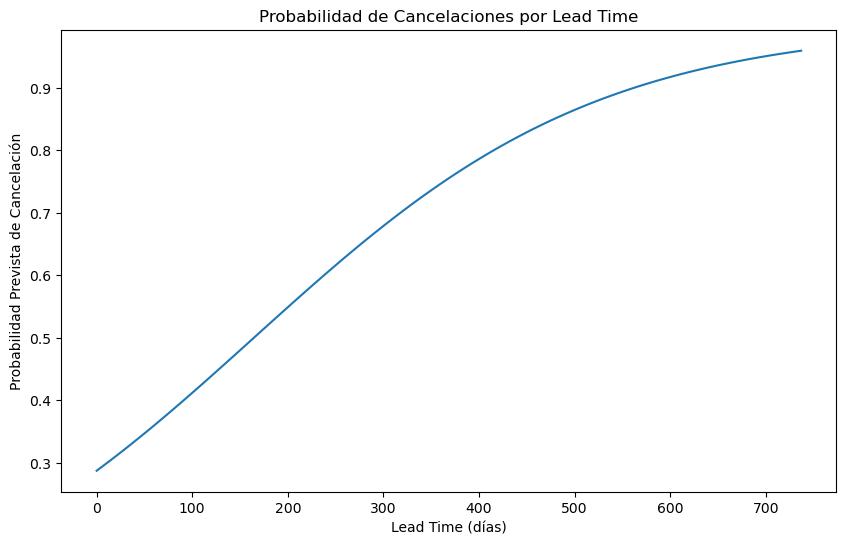

In [26]:
# Generamos rangos para los valores de Lead Time
lead_time_range = np.linspace(df_cancellations['lead_time'].min(), df_cancellations['lead_time'].max(), 100)
predict_data = pd.DataFrame({
    'lead_time': lead_time_range,
    'market_segment': 'Online TA',  
    'customer_type': 'Transient'  
})

# Predict probabilities
predict_data['predicted_prob'] = cancellation_model.predict(predict_data)

# Plot predicted probabilities
plt.figure(figsize=(10, 6))
plt.plot(predict_data['lead_time'], predict_data['predicted_prob'])
plt.title('Probabilidad de Cancelaciones por Lead Time')
plt.xlabel('Lead Time (días)')
plt.ylabel('Probabilidad Prevista de Cancelación')
plt.show()

##### 4.5 Analizando los plazos en las Reservas

<p>Para el siguiente análisis, crearé una nueva base de datos utilizando las columnas <i>hotel, lead_time, is_canceled, adr, arrival_date_year, arrival_date_month, market_segment, customer_type</i> de esta forma podremos analizar si el lead time es la variable que está afectando a las cancelaciones en las reservas.</p>

<p>Vamos a tratar de entender los patrones en las reservas para así los hoteles pueden crear estrategias que puedan ofrecer a sus clientes.</p>

##### 4.5.a Análisis de las Reservas, creamos una nueva base de datos

In [27]:
# Creando la base de datos de las reservas
df_book_lt = df_hb[['hotel','lead_time','is_canceled','adr','arrival_date_year','arrival_date_month','market_segment','customer_type']].copy()

df_book_lt.head(5)

hotel  lead_time  is_canceled   adr  arrival_date_year  \
0  Resort Hotel        342            0   0.0               2015   
1  Resort Hotel        737            0   0.0               2015   
2  Resort Hotel          7            0  75.0               2015   
3  Resort Hotel         13            0  75.0               2015   
4  Resort Hotel         14            0  98.0               2015   

  arrival_date_month market_segment customer_type  
0               July         Direct     Transient  
1               July         Direct     Transient  
2               July         Direct     Transient  
3               July      Corporate     Transient  
4               July      Online TA     Transient

In [28]:
df_book_lt.dtypes

hotel                  object
lead_time               int64
is_canceled             int64
adr                   float64
arrival_date_year       int64
arrival_date_month     object
market_segment         object
customer_type          object
dtype: object

<p>Con la nueva base de datos, visualicemos distribuciones y relaciones entre variables.</p>

##### 4.5.a.1 Análisis de las Reservas
<p>Comenzamos analizando el promedio de 'Lead time' entre el hotel 'City' y 'Resort', con el fin de comprender en cuál hotel se producen las reservas con mayor anticipación.</p>

In [29]:
# Promedio de anticipado de tiempo en las reservas
bavg_lead_time = df_book_lt.groupby('hotel')['lead_time'].mean()
print(bavg_lead_time)



hotel
City Hotel      109.741106
Resort Hotel     92.675686
Name: lead_time, dtype: float64


Correlación entre el plazo de reserva y la tasa de cancelación es: 0.29


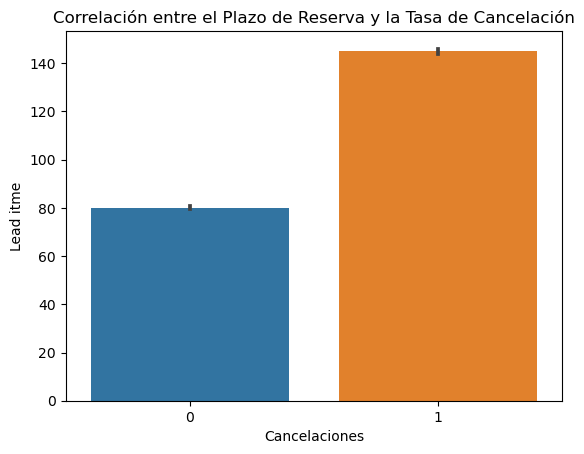

In [30]:
# Analizamos la correlación entre las cancelaciones y el tiempo anticipado en la reserva.
corr_cancellation = df_book_lt['lead_time'].corr(df_book_lt['is_canceled']).round(2)
print(f"Correlación entre el plazo de reserva y la tasa de cancelación es: {corr_cancellation}")


# Visualizamos los datos
sns.barplot(x='is_canceled', y='lead_time', data=df_book_lt)
plt.title('Correlación entre el Plazo de Reserva y la Tasa de Cancelación')
plt.xlabel('Cancelaciones')
plt.ylabel('Lead itme')
plt.show()

<p>Los resultados de nuestro análisis muestran que las variables <i>'Lead Time'</i> and <i>'Cancellations'</i>, poco se relacionan entre ellas, presentando un coeficiente de correlación de <b>0.29</b>. Las cancelaciones no se encuentran afectadas por el tiempo anticipado de reserva.<p>

<p>Vamos a introducir una nueva variable a nuestro análisis, ella es, <b><i>ADR (Average Daily rate)</i></b>.Trataré de identificar si el ADR está afectando a las cancelaciones en los hoteles.</p>

In [31]:
# Correlación entre Lead Time y ADR
corr_adr = df_book_lt['lead_time'].corr(df_book_lt['adr']).round(2)
print(f"La correlación entre el plazo de reserva y la tasa promedio diaria es: {corr_adr}")

La correlación entre el plazo de reserva y la tasa promedio diaria es: -0.06


<p>El resultado del análisis muestra un coeficiente de correlación de valor <b>-0.06</b>. Por lo que no hay correlación entre las variables, <i>'Lead Time'</i> and <i>'ADR'</i>. La nueva variable no afecta a las cancelaciones.<p>

<p>Visualizemos los datos con el fin de encontrar cómo las variables trabajan entre ellas. El resultado de nuestro análisis es encontrar insights que sean significativos.</p>

<p><i><u>Visualizando la distribución de Lead Time</u></i></p>
<p>Para visualizar nuestros datos, utilizaré los valores de la columna <i>'arrival_date_month'</i>. Estos valores junto a un boxplot nos ayudaran an entender mejor el análisis en las correlaciones.</p>

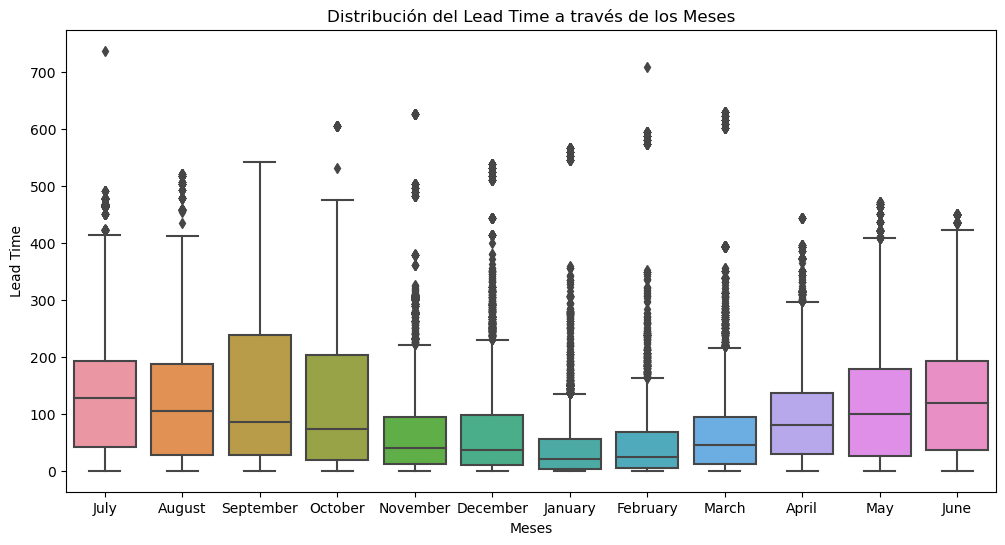

In [32]:
# Creating the visualization with the correlation between 'lead_time' and 'arrival_date_month'
# Size of the boxplot
plt.figure(figsize=(12, 6))

# Boxplot for the months
sns.boxplot(x='arrival_date_month', y='lead_time', data=df_book_lt)
plt.title('Distribución del Lead Time a través de los Meses')
plt.xlabel('Meses')
plt.ylabel('Lead Time')
plt.show()

<p>Como era de esperarse, la época de mayor ocupación es en la temporada de vacaciones, la cual comienza en
mayo y finaliza en octubre. Es importante destacar septiembre como uno de los meses que presenta mayor número de reservas.</p>

<p>Analicemos cómo se distribuye la ocupación para los diferentes segmentos hoteleros</p>

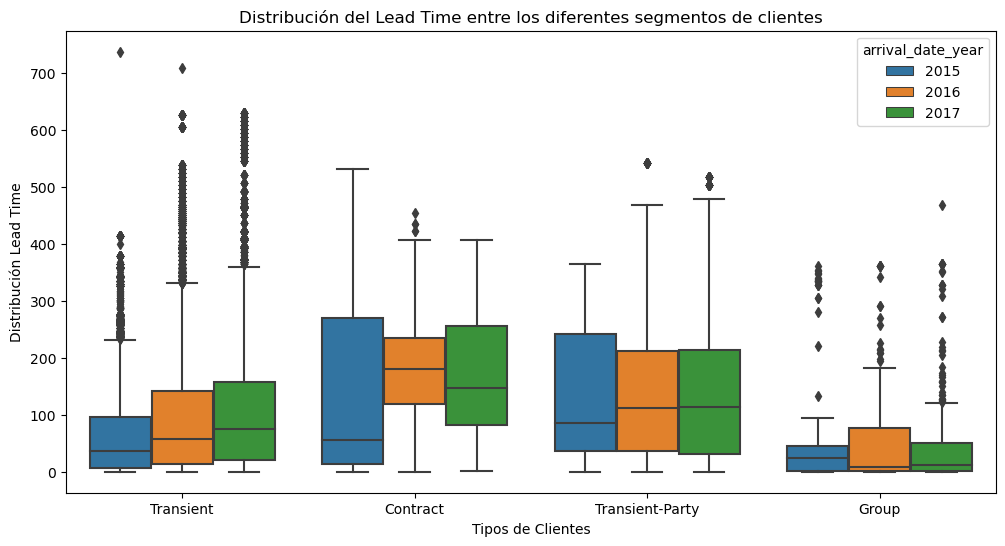

In [33]:
# Utilizaré los valores de la columna customer_type.
# Creamos el gráfico
plt.figure(figsize=(12,6))

# Boxplot con los valores de customer_type
sns.boxplot(x='customer_type', y='lead_time', hue='arrival_date_year', data=df_book_lt)
plt.title('Distribución del Lead Time entre los diferentes segmentos de clientes')
plt.xlabel('Tipos de Clientes')
plt.ylabel('Distribución Lead Time')
plt.show()

<p>Con la visualización de los datos, vamos con un par de conclusiones desde los diferentes segmentos de clientes:</p>
<ul>
<li>Con los clientes <i>Transient</i>, obsevamos demasiados valores atípicos. </u> Estos clientes muestran reservas dispares, pero la mayoría de las veces sus reservas son cercanas a la fecha de estadía. Entre los tres años, su tiempo de espera promedio es de aproximadamente 50 días. </li>

<li>Con los clientes<i>Contract</i>, la variabilidad en el tiempo de espera de las reservas en 2015 muestra ser alta, y a partir de 2016 comienza a disminuir. Además, la mediana era de alrededor de 50 días en 2015, pero luego aumentó en 2016 a alrededor de 180 días, y en 2017, disminuyó a aproximadamente 150 días.</li>

<li>Un análisis detallado de los datos de los clientes <i>Transient-Party</i> muestra que el número medio de reservas aumentó significativamente de 2015 a 2017, pasando de 80 a 100 días aproximadamente. No hay mucha variabilidad en el plazo de las reservas. Presentan una reducción en la variabilidad del plazo de reservas en 2017. En 2016, debido a algunos valores atípicos, están empezando a reservar mucho antes de su fecha de llegada.</li>

 <li>Los clientes <i>Group</i> muestran un tiempo de espera medio más bajo entre todos los clientes; tienden a reservar cerca de la fecha de estancia. Es importante tener en cuenta que, debido a que hay demasiados valores atípicos, también registran reservas mucho antes de la fecha de la estancia. Son los más constantes con sus reservas a lo largo de los años.</li>
</ul>

<p><b><i>Recomendaciones:</i></b></p>
<ul>
<li>Crear estrategias de marketing dirigidas a los clientes en función de sus patrones de reserva. Una de ellas puede ser un descuento por reserva con el fin de incentivar a los clientes a reservar con mayor antelación.</li>
<li>Establecer precios a largo plazo para ayudar a adelantar las reservas con los clientes <i>Contract</i>. Este tipo de estrategia ayudará a optimizar los ingresos.</li>
<li>De ser posible, asignar recursos y personal a segmentos más predecibles debido a su patrón de reserva para darles un enfoque de gestión diferente.</li>
</ul>

##### 4.6 Análisis de Ingresos

<p>Es hora de analizar el <b>ADR</b> (tarifa diaria promedio) de cada hotel. Vamos a analizar cuánto dinero se obtiene de cada uno de los hoteles, <i>City</i> y <i>Resort</i>. Comenzaré comparando el <i>ADR</i> entre ambos. Más tarde, analizaré la variación por <u>segmento</u> y <u>lead time</u>.</p>

<p>Para este nuevo análisis, crearé una nueva base de datos.</p>

In [34]:
# Creando la nueva base de datos
df_revAdr = df_hb[['hotel','adr', 'market_segment', 'customer_type', 'lead_time', 'arrival_date_year', 'reserved_room_type', 'assigned_room_type']].copy()

df_revAdr.head(5)

hotel   adr market_segment customer_type  lead_time  \
0  Resort Hotel   0.0         Direct     Transient        342   
1  Resort Hotel   0.0         Direct     Transient        737   
2  Resort Hotel  75.0         Direct     Transient          7   
3  Resort Hotel  75.0      Corporate     Transient         13   
4  Resort Hotel  98.0      Online TA     Transient         14   

   arrival_date_year reserved_room_type assigned_room_type  
0               2015                  C                  C  
1               2015                  C                  C  
2               2015                  A                  C  
3               2015                  A                  A  
4               2015                  A                  A

##### 4.6.a Comparando el ADR entre los hoteles City y Resort.

In [35]:
# Agrupando los datos por hotel
mean_Adr = df_revAdr.groupby('hotel')['adr'].mean().round(2).reset_index()

print(mean_Adr)

          hotel     adr
0    City Hotel  105.31
1  Resort Hotel   94.95


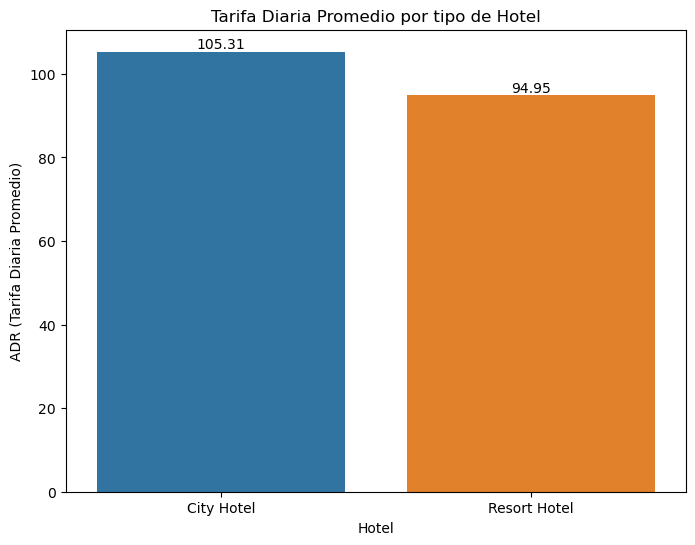

In [36]:
# Visualizando los datos con un gráfico bar
plt.figure(figsize=(8, 6))

# Creating the plot
ax = sns.barplot(x='hotel', y='adr', data=mean_Adr)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Tarifa Diaria Promedio por tipo de Hotel')
plt.xlabel('Hotel')
plt.ylabel('ADR (Tarifa Diaria Promedio)')
plt.show()

<p>Los datos muestran que el ADR (tasa promedio diaria) para el <i>City Hotel</i> es <b>105.31</b>, y para el <i>Resort Hotel</i> es <b>94.95</b>.</p>

##### 4.6.b Analizando la variación del ADR entre tipos de habitación, segmento de mercado y plazo de entrega.

##### 4.6.b.1 ADR variación por los distintos tipos de habitación.

In [37]:
# Variación por tipo de habitación
mean_adr_rt = df_revAdr.groupby('reserved_room_type')['adr'].mean().round().reset_index()

print(mean_adr_rt)

  reserved_room_type    adr
0                  A   91.0
1                  B   91.0
2                  C  160.0
3                  D  121.0
4                  E  125.0
5                  F  168.0
6                  G  176.0
7                  H  188.0
8                  L  125.0
9                  P    0.0


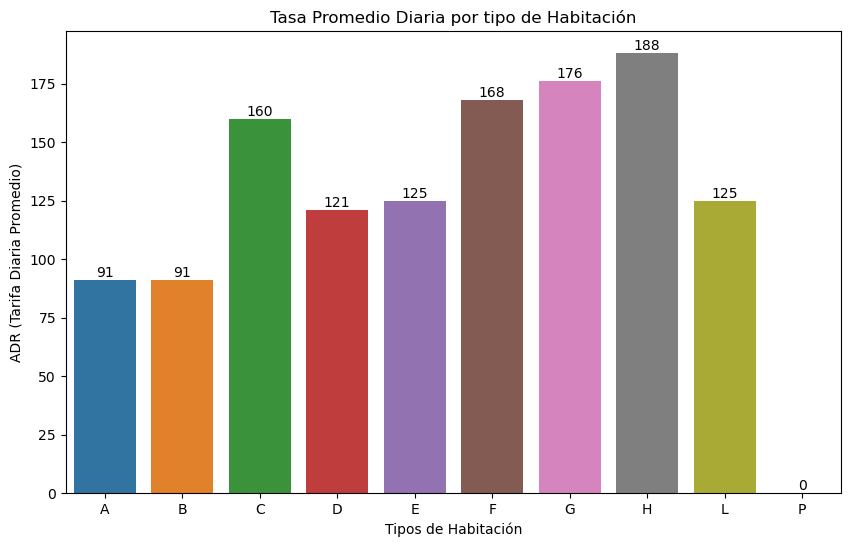

In [38]:
# Creando el gráficot
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='reserved_room_type', y='adr',  data=mean_adr_rt)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Tasa Promedio Diaria por tipo de Habitación')
plt.xlabel('Tipos de Habitación')
plt.ylabel('ADR (Tarifa Diaria Promedio)')
plt.show()

<p>Al analizar el ADR por <i>'Tipo de Habitación'</i>, los datos muestran que la habitación <b>H</b> tiene la tarifa diaria promedio más alta con un total de $188.-. Luego, con la tarifa diaria promedio más baja, tenemos las habitaciones <b>A</b> y <b>B</b>. Para este análisis, no consideré las plazas de estacionamiento.</p>

<p>Variación de los tipos de habitación por Hotel</p>

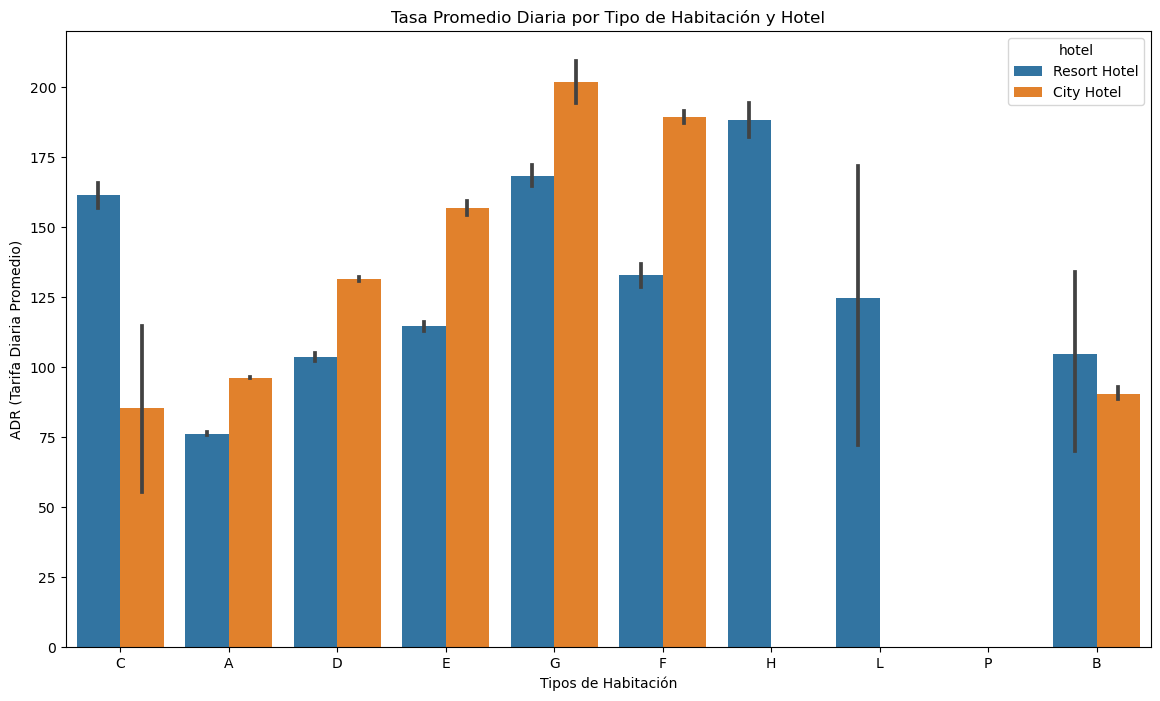

In [39]:
# Creando el gráficot
plt.figure(figsize=(14, 8))

ax = sns.barplot(x='reserved_room_type', y='adr',  hue='hotel', data=df_revAdr)

plt.title('Tasa Promedio Diaria por Tipo de Habitación y Hotel')
plt.xlabel('Tipos de Habitación')
plt.ylabel('ADR (Tarifa Diaria Promedio)')
plt.show()

<p>Al separar los datos entre los dos hoteles, la habitación <b>H</b> es exclusiva del Hotel <i>Resort</i>. Luego, las habitaciones <b>C</b> y <b>G</b>, son las que presentan un <u>ADR</u> más alto. Diferente es el caso del Hotel <i>City</i>, donde las habitaciones <b>G</b> y <b>F</b> son las que tienen el <u>ADR</u> más alto. Y las habitaciones <b>C</b>, <b>A</b> y <b>B</b> muestran el <u>ADR</u> más bajo.</p>

<p>Si comparamos ambos análisis, se observan cifras diferentes para el <u>ADR</u>. Es importante tener esta diferencia presente al momento de crear ofertas especiales para cada hotel.</p>

<p>Es momento de analizar si los hoteles asignan las habitaciones a cómo fueron reservadas.</p>

<p>Compararé los valores de la columna <i>'reserved_room_type'</i> y <i>'assigned_room_type'</i>. Almacenaré el resultado de la comparación en una nueva columna llamada <i>'room_assigned_correctly'</i>, con 0 para valores <i>False</i> y 1 para valores <i>True</i>.</p>

In [40]:
# Comparando los valores de las columnas
df_revAdr['room_assigned_correctly'] = (df_revAdr['reserved_room_type'] == df_revAdr['assigned_room_type']).astype(int)

df_revAdr.head()

hotel   adr market_segment customer_type  lead_time  \
0  Resort Hotel   0.0         Direct     Transient        342   
1  Resort Hotel   0.0         Direct     Transient        737   
2  Resort Hotel  75.0         Direct     Transient          7   
3  Resort Hotel  75.0      Corporate     Transient         13   
4  Resort Hotel  98.0      Online TA     Transient         14   

   arrival_date_year reserved_room_type assigned_room_type  \
0               2015                  C                  C   
1               2015                  C                  C   
2               2015                  A                  C   
3               2015                  A                  A   
4               2015                  A                  A   

   room_assigned_correctly  
0                        1  
1                        1  
2                        0  
3                        1  
4                        1

<p>Ahora que tenemos la nueva columna, es momento de analizar cómo funciona la asignación de las habitaciones</p>

1    104469
0     14917
Name: room_assigned_correctly, dtype: int64


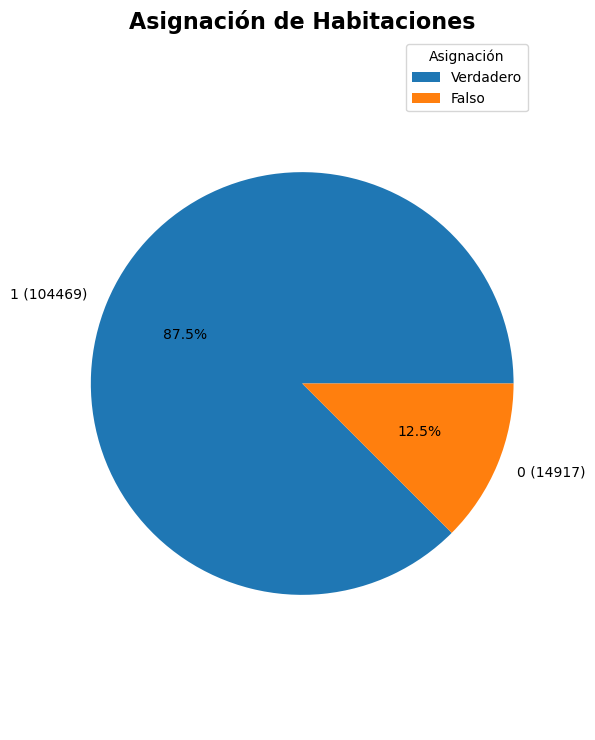

In [41]:
# Contando los valores
room_corr_assigned = df_revAdr['room_assigned_correctly'].value_counts()

print(room_corr_assigned)

# Variables Total y Porcentaje para nuestros gráficos
total_rca_count = room_corr_assigned.sum()
rca_percentage = (room_corr_assigned / total_rca_count) * 100

# Creamos las etiquetas mediante una función
labels = [f'{rooms} ({count})' for rooms, count in zip(room_corr_assigned.index, room_corr_assigned)]

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(6, 9))

# Generando el gráfico
plt.pie(room_corr_assigned, labels=labels, autopct='%1.1f%%')
ax.legend(['Verdadero', 'Falso'], loc='upper right', title='Asignación')
# plt.legend(title='Correctly')
ax.set_title('Asignación de Habitaciones', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

<p>Analizando la asignación de habitaciones, se observa que el <b>87,5%</b> de las habitaciones están correctamente asignadas, esto significa que los clientes reciben la habitación que reservaron. Se recomienda a futuro, intentar reducir el <b>12,5%</b> de asignación incorrecta de habitaciones. Un porcentaje mayor de asignación incorrecta de habitaciones puede producir malestar en los clientes y en algún momento perderlos.</p>

<p>Será interesante hacer un seguimiento del <b>12,5%</b> con el fin de saber si, en ese porcentaje se produjo una mejora de habitación. Una habitación más bonita en el mayor de los casos tendremos un cliente más satisfecho.<p>

##### 4.6.b.2 Variación ADR por los distintos Segmentos del Mercado.

In [42]:
# Variación por Mercados
mean_adr_mkt = df_revAdr.groupby('market_segment')['adr'].mean().round().reset_index()

print(mean_adr_mkt)

  market_segment    adr
0       Aviation  100.0
1  Complementary    3.0
2      Corporate   69.0
3         Direct  115.0
4         Groups   79.0
5  Offline TA/TO   87.0
6      Online TA  117.0


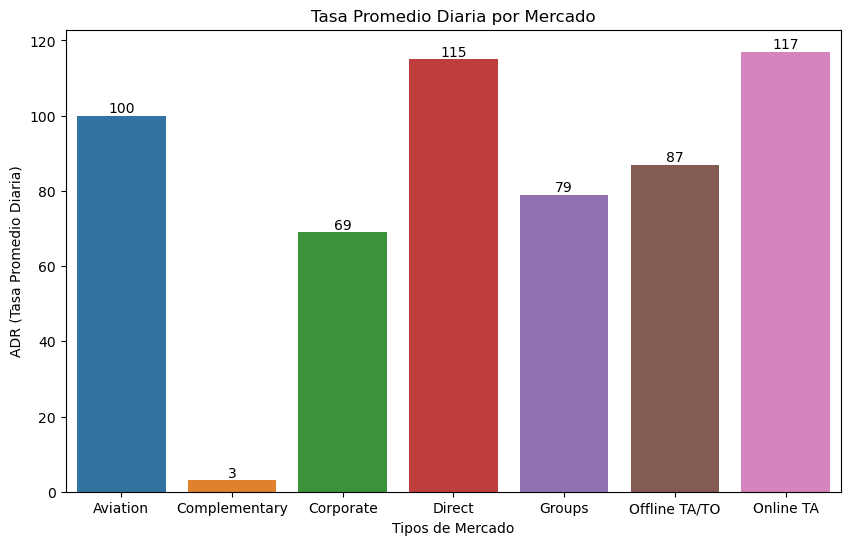

In [43]:
# Creando el gráfico
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='market_segment', y='adr', data=mean_adr_mkt)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Tasa Promedio Diaria por Mercado')
plt.xlabel('Tipos de Mercado')
plt.ylabel('ADR (Tasa Promedio Diaria)')
plt.show()

<p>Al analizar el ADR por segmento de mercado, se observa que el mercado <i>Direct</i>, el <i>Aviation</i>, y el <i>Online</i> son los mercados en los que el hotel recibe más reservas. En estos mercados es donde el hotel puede ofrecer ventajas especiales o dirigir las ofertas a otros segmentos para ayudarlos a crecer.</p>

<p>Variación de los Mercados por Hotel</p>

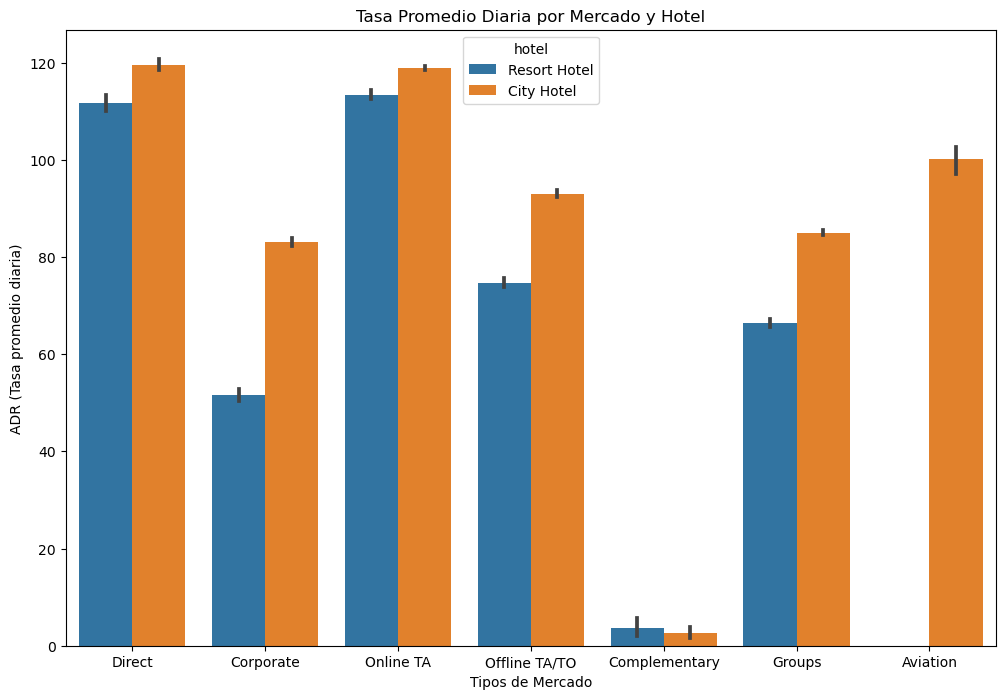

In [44]:
# Creando el gráfico
plt.figure(figsize=(12, 8))

ax = sns.barplot(x='market_segment', y='adr', hue='hotel', data=df_revAdr)
plt.title('Tasa Promedio Diaria por Mercado y Hotel')
plt.xlabel('Tipos de Mercado')
plt.ylabel('ADR (Tasa promedio diaria)')
plt.show()

<p>El análisis de los segmentos de mercado por Hoteles, no muestra demasiada variación. Este análisis nos ayuda a crear ofertas más específicas por hotel y segmento de mercado.</p>

##### 4.6.b.3 Variación ADR por el plazo de Reserva.

In [45]:
# Como para este análisis poseemos demasiados valores, voy a crear conjuntos para agruparlos y ayuda a entender los números.
# Agrupando los valores
df_revAdr['lt_enclosed'] = pd.cut(df_revAdr['lead_time'], bins=[0, 30, 90, 180, 365], labels=['0-30', '31-90', '91-180', '181-365'])
mean_adr_ltbucket = df_revAdr.groupby('lt_enclosed')['adr'].mean().round().reset_index()
mean_adr_lt = df_revAdr.groupby('lead_time')['adr'].mean().round().reset_index()

print(mean_adr_lt)
print(mean_adr_ltbucket)

     lead_time   adr
0            0  83.0
1            1  90.0
2            2  94.0
3            3  93.0
4            4  95.0
..         ...   ...
474        622  62.0
475        626  63.0
476        629  62.0
477        709  68.0
478        737   0.0

[479 rows x 2 columns]
  lt_enclosed    adr
0        0-30  102.0
1       31-90  107.0
2      91-180  109.0
3     181-365   95.0


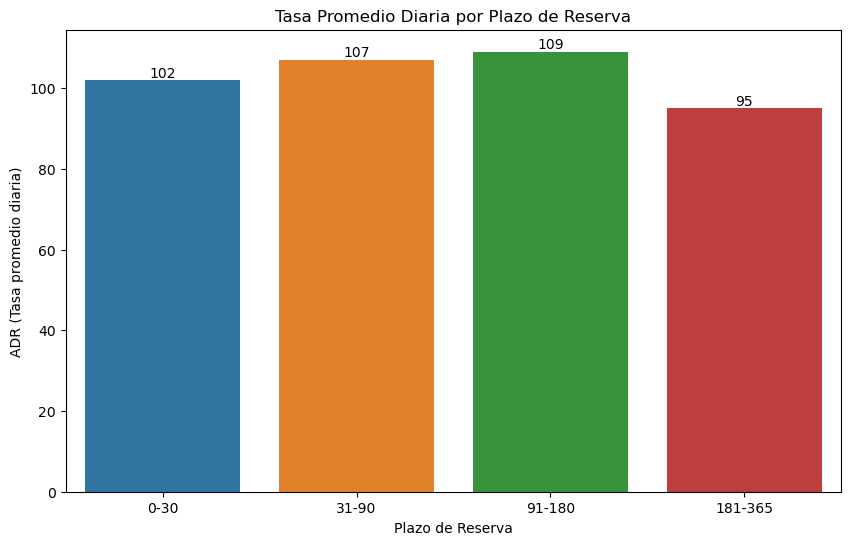

In [46]:
# Creando el gráfico
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='lt_enclosed', y='adr', data=mean_adr_ltbucket)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Tasa Promedio Diaria por Plazo de Reserva')
plt.xlabel('Plazo de Reserva')
plt.ylabel('ADR (Tasa promedio diaria)')
plt.show()

<p>Plazo en las Reservas por Hotel</p>

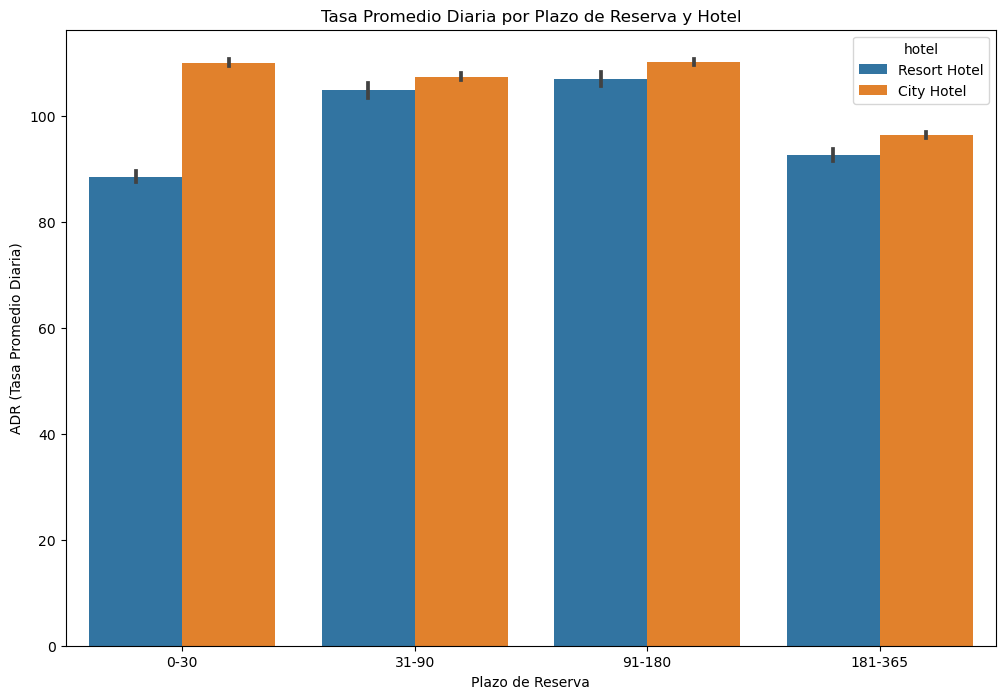

In [47]:
# Creando los gráficos
plt.figure(figsize=(12, 8))

ax = sns.barplot(x='lt_enclosed', y='adr', hue='hotel', data=df_revAdr)
plt.title('Tasa Promedio Diaria por Plazo de Reserva y Hotel')
plt.xlabel('Plazo de Reserva')
plt.ylabel('ADR (Tasa Promedio Diaria)')
plt.show()

##### 4.7 Segmentación de los clientes

adults      221627.0
children     12403.0
babies         949.0
dtype: float64


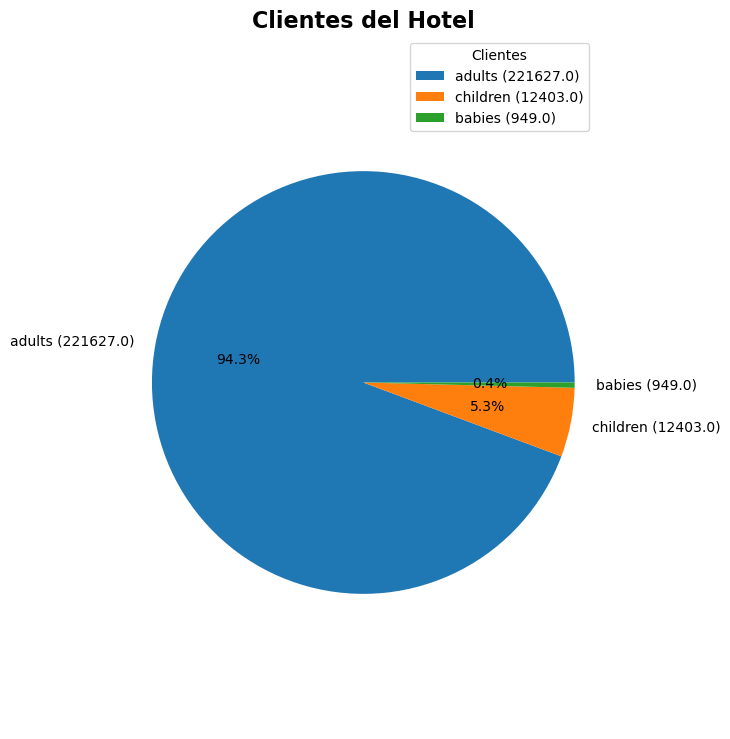

In [48]:
customer_count = df_hb[['adults', 'children', 'babies']].sum()

print(customer_count)

# Variables Total y Porcentaje para los gráficos
total_ctmr_count = customer_count.sum()
ctmr_percentage = (customer_count / total_ctmr_count) * 100

# Utilizando una función para crear las etiquetas
labels = [f'{customer} ({count})' for customer, count in zip(customer_count.index, customer_count)]

# Tamaño del gráfico
fig, ax = plt.subplots(figsize=(6, 9))

# Gráfico
plt.pie(customer_count, labels=labels, autopct='%1.1f%%')
plt.legend(title='Clientes', loc='upper right')
ax.set_title('Clientes del Hotel', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

PRT    48586
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 178, dtype: int64
PRT       48586
GBR       12129
FRA       10415
ESP        8568
DEU        7287
ITA        3766
IRL        3375
BEL        2342
BRA        2224
NLD        2104
USA        2097
CHE        1730
CN         1279
AUT        1263
SWE        1024
CHN         999
POL         919
ISR         669
RUS         632
NOR         607
ROU         500
OTHERS     6871
Name: country, dtype: int64


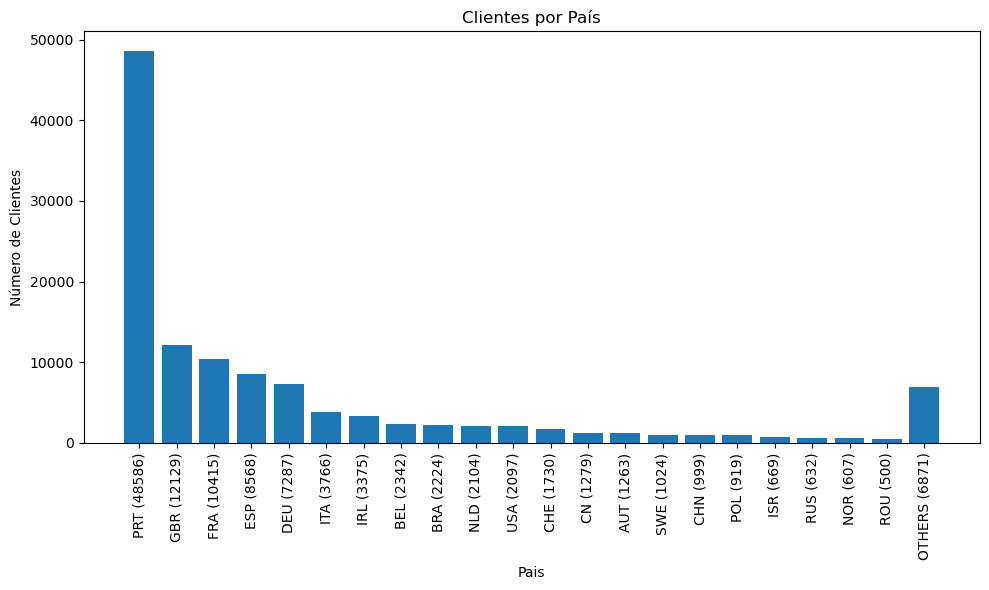

In [49]:
# Contando los países de procedencia de los clientes
country_count = df_hb['country'].value_counts()

print(country_count)

# Como se registran muchos países, vamos a recortar los valores, aquellos que posean menos de 500 serán reemplazados por el valor 'OTHER'
less_than_500_customers = 500
new_ctry_count = country_count[country_count < less_than_500_customers].sum()
country_count = country_count[country_count >= less_than_500_customers]
country_count['OTHERS'] = new_ctry_count

# Verificando que la condicion funcionó correctamente
print(country_count)

# Creamos las etiquetas para nuestro gráfico
labels = [f'{country} ({count})' for country, count in country_count.items()]

# Realizamos un gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(country_count.index, country_count.values)
ax.set_xticklabels(labels, rotation=90)
ax.set_title('Clientes por País')
ax.set_xlabel('Pais')
ax.set_ylabel('Número de Clientes')
plt.tight_layout()
plt.show()

